In [2]:
import sklearn
print(sklearn.__version__)


1.3.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the datasets
training_data = pd.read_csv('sentimentsdata/twitter_training.csv')
validation_data = pd.read_csv('sentimentsdata/twitter_validation.csv')


In [13]:
# Display the first few rows of the training data
print(training_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [14]:
# Display the first few rows of the validation data
print(validation_data.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [15]:
# Check the shape and columns of the datasets
print(training_data.shape)
print(validation_data.shape)

(74681, 4)
(999, 4)


In [16]:
# Check for missing values
print(training_data.isnull().sum())
print(validation_data.isnull().sum())

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64
3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0

In [25]:
import pandas as pd


training_data = pd.read_csv('sentimentsdata/twitter_training.csv', delimiter=',', header=None)

# Display the first few rows of the DataFrame
print(training_data.head())


      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [26]:
print(training_data.columns)

Index([0, 1, 2, 3], dtype='int64')


In [27]:
# Assigning column names
training_data.columns = ['id', 'platform', 'sentiment', 'text']

# Display the DataFrame with column names
print(training_data.head())


     id     platform sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [34]:
# Check for missing values in training data
print("Training Data Missing Values:")
print(training_data.isnull().sum())



Training Data Missing Values:
id             0
platform       0
sentiment      0
text         686
dtype: int64


In [33]:
validation_data = pd.read_csv('sentimentsdata/twitter_validation.csv', delimiter=',', header=None)
validation_data.columns = ['id', 'platform', 'sentiment', 'text']
print(validation_data.head())

     id   platform   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  


In [35]:

# Check for missing values in validation data
print("\nValidation Data Missing Values:")
print(validation_data.isnull().sum())


Validation Data Missing Values:
id           0
platform     0
sentiment    0
text         0
dtype: int64


In [36]:
print(training_data.columns)
print(validation_data.columns)

Index(['id', 'platform', 'sentiment', 'text'], dtype='object')
Index(['id', 'platform', 'sentiment', 'text'], dtype='object')


In [37]:
print(training_data.info())
print(validation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   platform   74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   platform   1000 non-null   object
 2   sentiment  1000 non-null   object
 3   text       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None


In [39]:
import re
import pandas as pd

def remove_urls(text):
    if isinstance(text, str):  # Only apply the function to string values
        return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    return ''  # Return an empty string if it's not a valid string

# Apply the function to your dataset
training_data['cleaned_text'] = training_data['text'].apply(remove_urls)

# Check the cleaned data
print(training_data[['text', 'cleaned_text']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [41]:
def remove_mentions_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

training_data['cleaned_text'] = training_data['cleaned_text'].apply(remove_mentions_hashtags)
print(training_data[['text', 'cleaned_text']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        cleaned_text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [42]:
training_data['cleaned_text'] = training_data['cleaned_text'].str.lower()

In [43]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

training_data['cleaned_text'] = training_data['cleaned_text'].apply(remove_special_characters)


In [46]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

training_data['cleaned_text'] = training_data['cleaned_text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arijc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [47]:
print(training_data[['text', 'cleaned_text']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_text  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


In [48]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

training_data['tokens'] = training_data['cleaned_text'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arijc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [49]:
print(training_data[['text', 'cleaned_text']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_text  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


In [50]:
# Drop rows with missing values
training_data.dropna(subset=['text'], inplace=True)

# Alternatively, you can fill missing values with a placeholder
training_data['text'].fillna('missing', inplace=True)


In [51]:
print(training_data[['text', 'cleaned_text', 'tokens']].head())


                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_text                              tokens  
0  im getting borderlands murder  [im, getting, borderlands, murder]  
1            coming borders kill             [coming, borders, kill]  
2    im getting borderlands kill    [im, getting, borderlands, kill]  
3   im coming borderlands murder   [im, coming, borderlands, murder]  
4  im getting borderlands murder  [im, getting, borderlands, murder]  


In [55]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arijc\AppData\Roaming\nltk_data...


True

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet and extract the compound score
training_data['sentiment_score'] = training_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# View the results
print(training_data[['cleaned_text', 'sentiment_score']].head())


                    cleaned_text  sentiment_score
0  im getting borderlands murder          -0.6908
1            coming borders kill          -0.6908
2    im getting borderlands kill          -0.6908
3   im coming borderlands murder          -0.6908
4  im getting borderlands murder          -0.6908


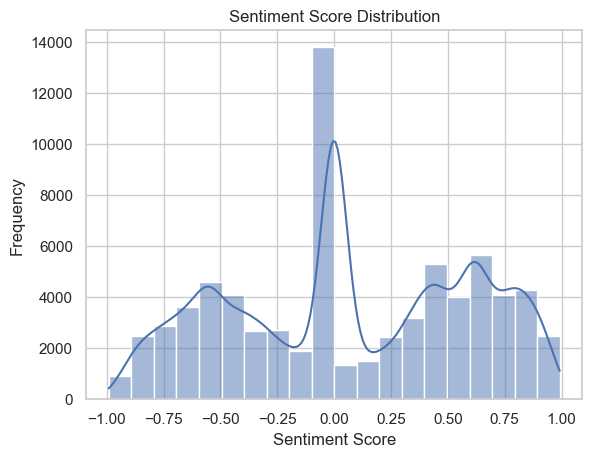

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to visualize the sentiment distribution
sns.histplot(training_data['sentiment_score'], bins=20, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [59]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization
training_data['sentiment_category'] = training_data['sentiment_score'].apply(categorize_sentiment)

# View sentiment categories
print(training_data[['cleaned_text', 'sentiment_score', 'sentiment_category']])


                                            cleaned_text  sentiment_score  \
0                          im getting borderlands murder          -0.6908   
1                                    coming borders kill          -0.6908   
2                            im getting borderlands kill          -0.6908   
3                           im coming borderlands murder          -0.6908   
4                          im getting borderlands murder          -0.6908   
...                                                  ...              ...   
74677  realized windows partition mac like years behi...           0.3612   
74678  realized mac window partition years behind nvi...           0.0000   
74679  realized windows partition mac years behind nv...           0.0000   
74680  realized windows partition mac like years behi...           0.3612   
74681  like windows partition mac like years behind d...           0.6124   

      sentiment_category  
0               negative  
1               negat

In [60]:
validation_data['cleaned_text'] = validation_data['text'].apply(remove_stopwords)  # Assuming remove_stopwords is defined
validation_data['tokens'] = validation_data['cleaned_text'].apply(lambda x: x.split())

In [61]:
validation_data['sentiment_score'] = validation_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

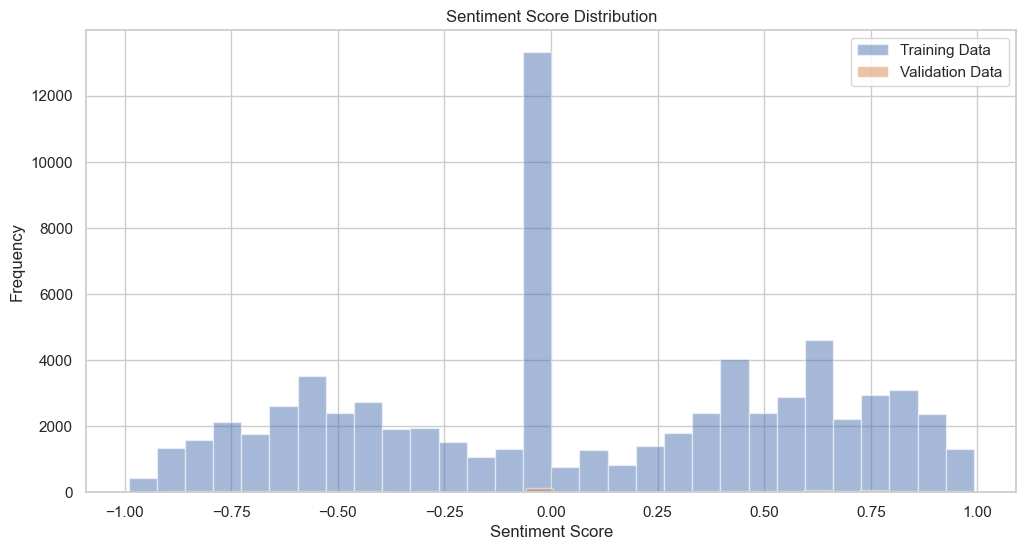

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(training_data['sentiment_score'], bins=30, alpha=0.5, label='Training Data')
plt.hist(validation_data['sentiment_score'], bins=30, alpha=0.5, label='Validation Data')
plt.legend()
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [66]:
print("Training Data Score Range:", training_data['sentiment_score'].min(), training_data['sentiment_score'].max())
print("Validation Data Score Range:", validation_data['sentiment_score'].min(), validation_data['sentiment_score'].max())


Training Data Score Range: -0.9906 0.992
Validation Data Score Range: -0.9709 0.9818


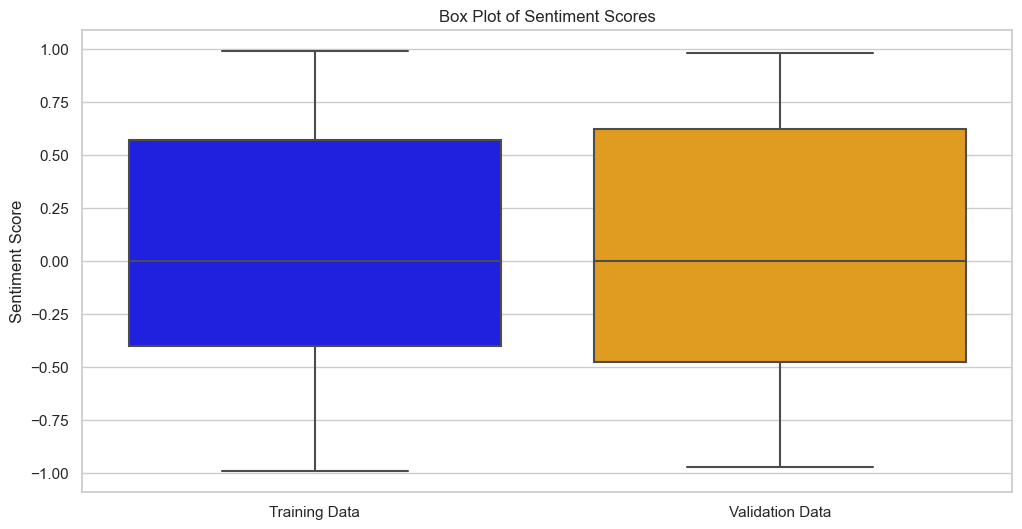

In [67]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=[training_data['sentiment_score'], validation_data['sentiment_score']], 
            palette=["blue", "orange"])
plt.xticks([0, 1], ['Training Data', 'Validation Data'])
plt.title('Box Plot of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.show()


In [68]:
print("Training Data Count:", len(training_data))
print("Validation Data Count:", len(validation_data))


Training Data Count: 73996
Validation Data Count: 1000


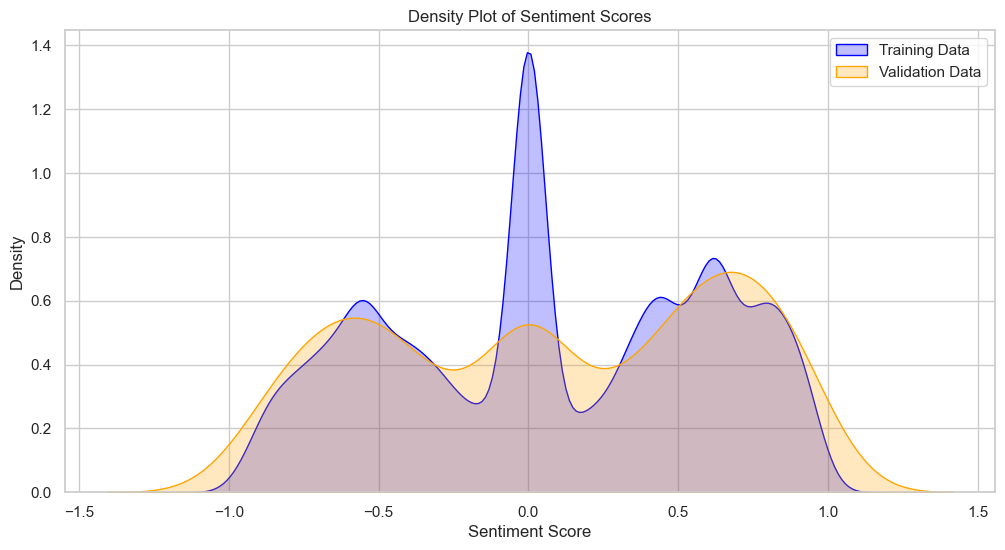

In [69]:
plt.figure(figsize=(12, 6))
sns.kdeplot(training_data['sentiment_score'], label='Training Data', color='blue', fill=True)
sns.kdeplot(validation_data['sentiment_score'], label='Validation Data', color='orange', fill=True)
plt.title('Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()


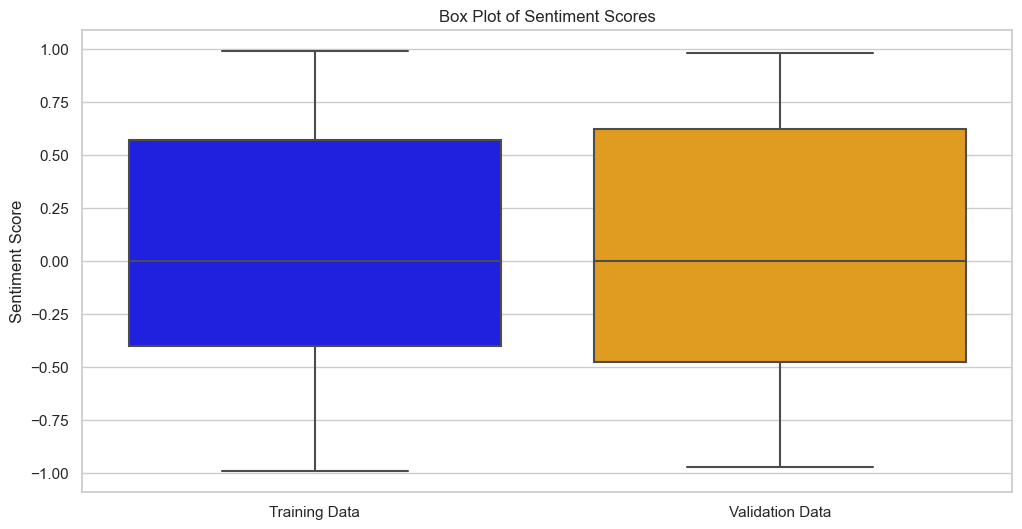

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[training_data['sentiment_score'], validation_data['sentiment_score']], 
            palette=["blue", "orange"])
plt.xticks([0, 1], ['Training Data', 'Validation Data'])
plt.title('Box Plot of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.show()


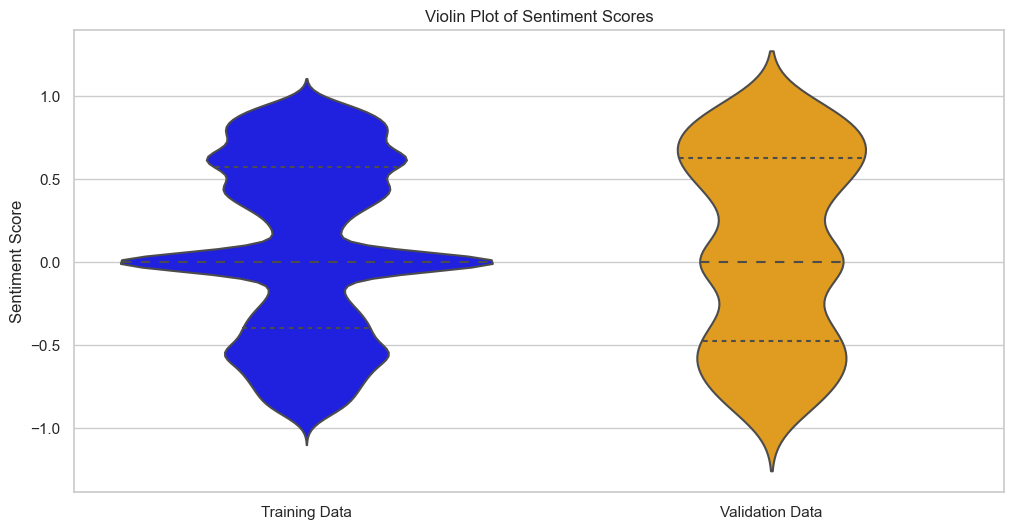

In [71]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=[training_data['sentiment_score'], validation_data['sentiment_score']], 
               palette=["blue", "orange"], inner="quartile")
plt.xticks([0, 1], ['Training Data', 'Validation Data'])
plt.title('Violin Plot of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.show()
